In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df=pd.read_csv("covid.csv")
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [3]:
df=df.drop(columns=['Date'])

In [4]:
# Grouped by country to know the total of each column wrt country
df=df .groupby(['Country'])['Confirmed','Recovered', 'Deaths'].sum().reset_index()

In [5]:
df

,Country,Confirmed,Recovered,Deaths
0,Afghanistan,185236,20845,4669
1,Albania,41253,25688,1629
2,Algeria,240070,107345,23232
3,Andorra,41573,20751,2219
4,Angola,1892,506,131
...,...,...,...,...
183,West Bank and Gaza,19971,8798,113
184,Western Sahara,307,186,1
185,Yemen,2696,92,460
186,Zambia,15285,5281,215


In [6]:
df.describe()#as we can see the mean is far from median so skewness is their in data

,Confirmed,Recovered,Deaths
count,1.880000e+02,1.880000e+02,1.880000e+02
mean,1.004140e+06,3.253070e+05,6.639381e+04
std,4.567753e+06,1.121162e+06,3.088152e+05
min,1.900000e+01,0.000000e+00,0.000000e+00
25%,7.594250e+03,2.169500e+03,1.582500e+02
50%,4.642850e+04,1.776400e+04,8.435000e+02
75%,3.891915e+05,1.076598e+05,8.738750e+03
max,5.709877e+07,8.428678e+06,3.221969e+06


In [7]:
df.isnull().sum()

Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

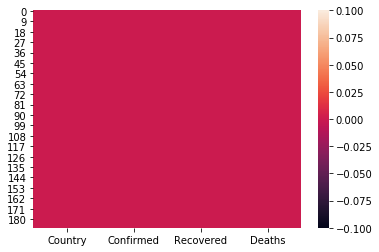

In [8]:
sns.heatmap(df.isnull())#no null data

In [9]:
df.corr()#each column is related to each other closely

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.801388,0.926449
Recovered,0.801388,1.000000,0.759967
Deaths,0.926449,0.759967,1.000000


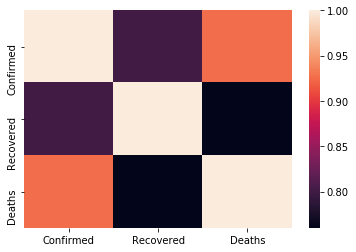

In [10]:
sns.heatmap(df.corr())

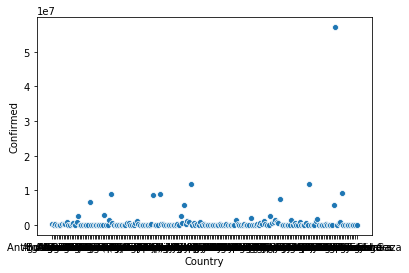

In [11]:
sns.scatterplot(x='Country',y='Confirmed',data=df) # to check impact on target
plt.show()

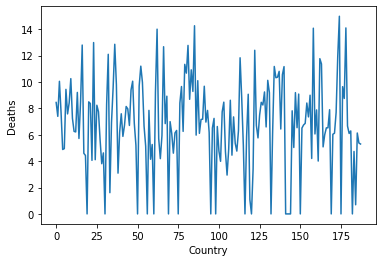

In [33]:
sns.lineplot(x='Country',y='Deaths',data=df) # to check impact on target
plt.show()

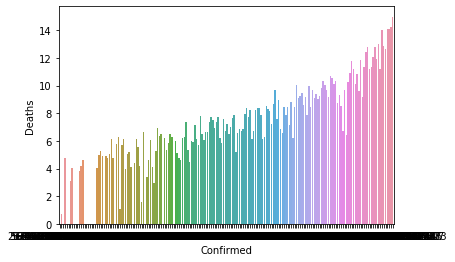

In [31]:
sns.barplot(x='Confirmed',y='Deaths',data=df) # to check impact on target that as the no of confirmed cases increasing no of deaths also increasing
plt.show()

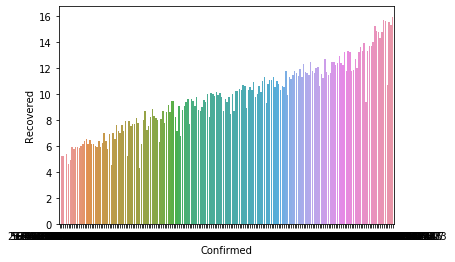

In [32]:
sns.barplot(x='Confirmed',y='Recovered',data=df) # to check impact on target that recovery is increasing more then death with increase in confirmed
plt.show()

In [15]:
con=df['Country']

In [16]:
df['Country'] = df['Country'].astype('category').cat.codes
df.head()


,Country,Confirmed,Recovered,Deaths
0,0,185236,20845,4669
1,1,41253,25688,1629
2,2,240070,107345,23232
3,3,41573,20751,2219
4,4,1892,506,131


In [17]:
df.skew()

Country       0.000000
Confirmed    10.303690
Recovered     5.019751
Deaths        7.399787
dtype: float64

In [18]:
# handling skewness
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [19]:
x=df.iloc[:,0:-1]
x

,Country,Confirmed,Recovered
0,0,12.129391,9.944917
1,1,10.627503,10.153818
2,2,12.388690,11.583813
3,3,10.635230,9.940398
4,4,7.545918,6.228511
...,...,...,...
183,183,9.902087,9.082393
184,184,5.730100,5.231109
185,185,7.899895,4.532599
186,186,9.634693,8.572060


In [20]:
y=df.iloc[:,-1]
y

0       8.448914
1       7.396335
2      10.053329
3       7.705262
4       4.882802
         ...    
183     4.736198
184     0.693147
185     6.133398
186     5.375278
187     5.298317
Name: Deaths, Length: 188, dtype: float64

In [21]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [22]:
maxrscore=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred= reg.predict(x_test)
    r2s=r2_score(y_test,y_pred)
    if r2s > maxrscore:
        maxrscore=r2s
        fr_state=r_state
print("max r2 score corresponding to ",fr_state," is ",maxrscore)

max r2 score corresponding to  52  is  0.895231537176643


In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()

0.7834119284957831

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=52)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [25]:
print("error:")
print("r2 score is: ",r2_score(y_test,y_pred))
print("root Mean squared error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

error:
r2 score is:  0.895231537176643
root Mean squared error:  1.170710151465075


In [26]:
from sklearn.externals import joblib

In [27]:
joblib.dump(lreg,'covid.pkl')

['covid.pkl']

In [28]:
model=joblib.load('covid.pkl')

In [29]:
model.predict(x_test.head())

array([ 6.28509336,  7.06427761, 11.73715708,  1.77457452,  5.17897714])

In [30]:
y_test.head()

94      6.177944
102     7.738488
81     12.774113
142     0.000000
183     4.736198
Name: Deaths, dtype: float64